In [1]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
Th_Glu <- readRDS('/data/work/5month_Th/Glu/10_Th_Glu_unannotation.rds')
Th_Glu

An object of class Seurat 
18448 features across 22317 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
Th_Glu

An object of class Seurat 
18448 features across 22317 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
Idents(Th_Glu) <- Th_Glu$`Sample_ID`

In [7]:
# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(Th_Glu, split.by = "Sample_ID")

# NormalizeData
for (name in names(budgerigar_brain_obj_list)) {
    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”


In [8]:
integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


In [9]:
####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca")

Th_Glu <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 804 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1007 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new dat

In [10]:
# Scale data (default: only for variable features)
variable_feature <- rownames(Th_Glu)

In [11]:
Th_Glu <- ScaleData(Th_Glu, features = variable_feature, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA

Centering and scaling data matrix



In [12]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(Th_Glu) <- "integrated"

# PCA

Th_Glu <- RunPCA(Th_Glu, assay = "integrated", verbose = T) 

PC_ 1 
Positive:  NFIB, UNC13C, PTPRT, NFIA, SPHKAP, DACH2, ST18, SULF1, ENSMUNG00000006631, SCUBE1 
	   CADPS2, C8orf34, CHD7, DACH1, ENSMUNG00000006633, EBF3, IRX1, NRP1, LMO3, CDH23 
	   WNT4, RGS6, PKP2, IL1RAPL1, GABRG3, IL18R1, DPF3, ZNF536, THSD7B, ZNF385D 
Negative:  ENSMUNG00000000532, PLEKHA5, ENSMUNG00000002084, NTNG1, CACNA1B, DSCAM, KCNT2, SCN4B, NTS, ENSMUNG00000015432 
	   ENSMUNG00000001681, MYO1B, ENSMUNG00000007670, CHST8, CRISPLD2, PTPRD, RAPGEF2, SLF1, FGFR2, GRM8 
	   VIP, STRBP, HMBOX1, PROX1, NR2F1, FOXP2, NIN, GPR157, ITGA2, PTPRC 
PC_ 2 
Positive:  ATP1B1, NEFL, SLC18A2, MDH1, SLC10A4, ENSMUNG00000008602, MAP1B, COX3, ENSMUNG00000010799, NR4A2 
	   RET, EN1, ENSMUNG00000004039, MAP1A, SNCG, C1QTNF4, CKB, CYGB, DDC, PVALB 
	   HPCAL1, GAD2, SLC6A2, TH, CYTB, TAFA3, CCN3, GATA3, ND5, AKAP12 
Negative:  XKR4, NFIB, GALNTL6, CELF2, PTPRD, NKAIN2, GRIK2, SPHKAP, ZFPM2, DMD 
	   GABRG3, ITPR1, ENSMUNG00000002688, CDH11, KCNMA1, UNC13C, SORCS2, NXPH1, CDH10, LRP1B 
	 

In [13]:
Th_Glu <- FindNeighbors(Th_Glu, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:39:58 UMAP embedding parameters a = 0.9922 b = 1.112

13:39:58 Read 22317 rows and found 40 numeric columns

13:39:58 Using Annoy for neighbor search, n_neighbors = 30

13:39:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:40:02 Writing NN index file to temp file /tmp/Rtmp5mJPCZ/file88b24e46770

13:40:02 Searching Annoy index using 1 thread, search_k 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9269
Number of communities: 13
Elapsed time: 7 seconds


1 singletons identified. 12 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9006
Number of communities: 19
Elapsed time: 7 seconds


1 singletons identified. 18 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8806
Number of communities: 21
Elapsed time: 9 seconds


1 singletons identified. 20 final clusters.



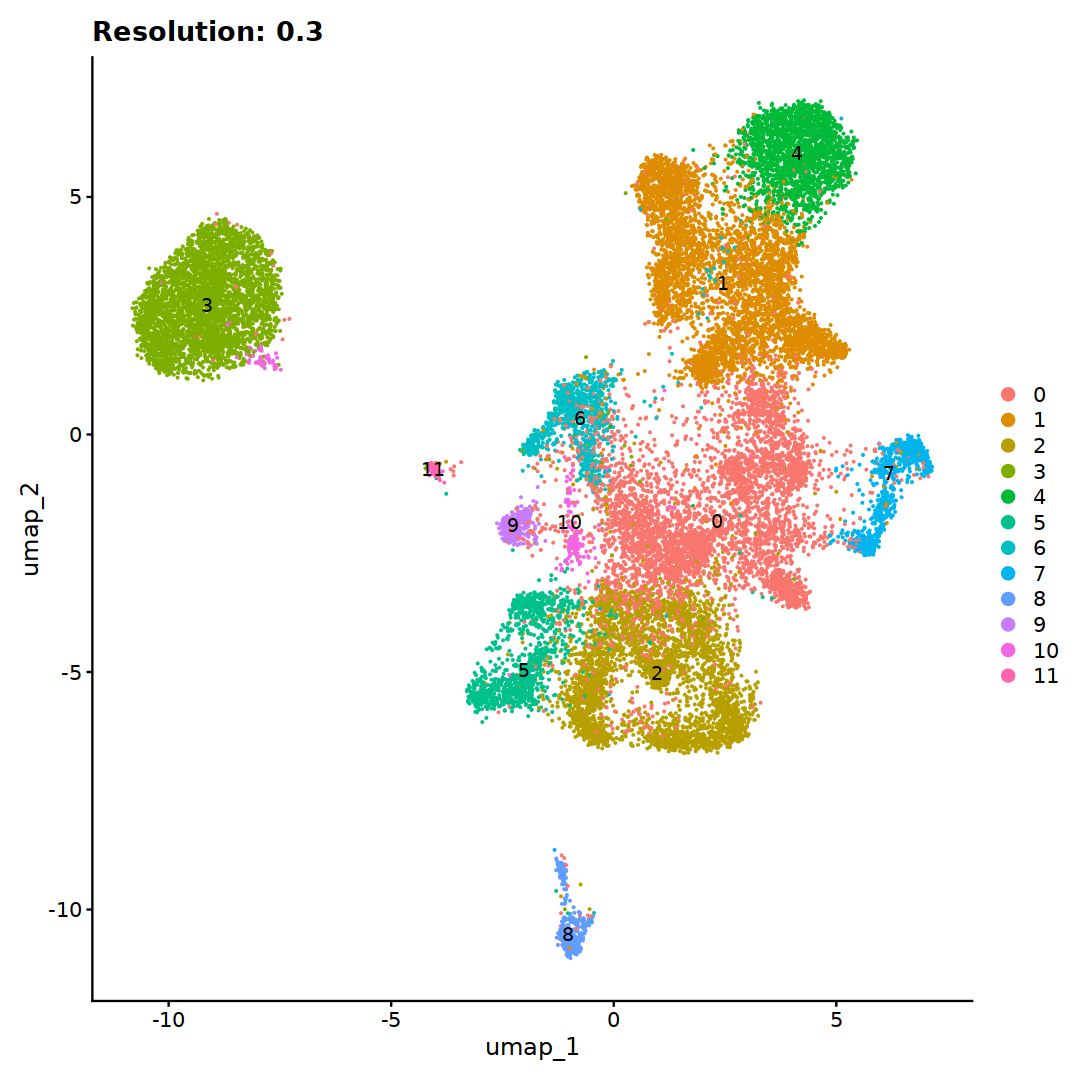

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8743
Number of communities: 25
Elapsed time: 7 seconds


1 singletons identified. 24 final clusters.



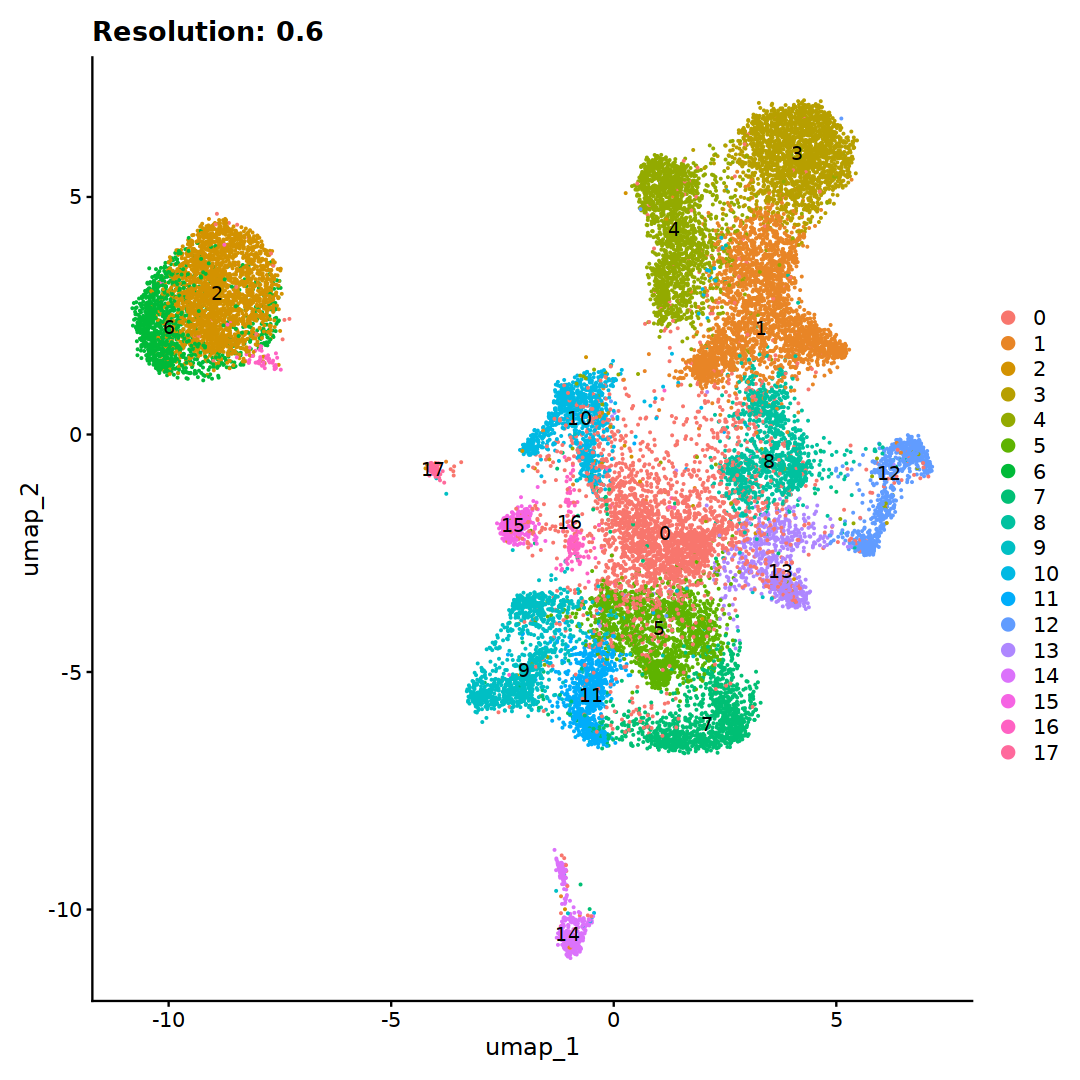

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8628
Number of communities: 26
Elapsed time: 9 seconds


1 singletons identified. 25 final clusters.



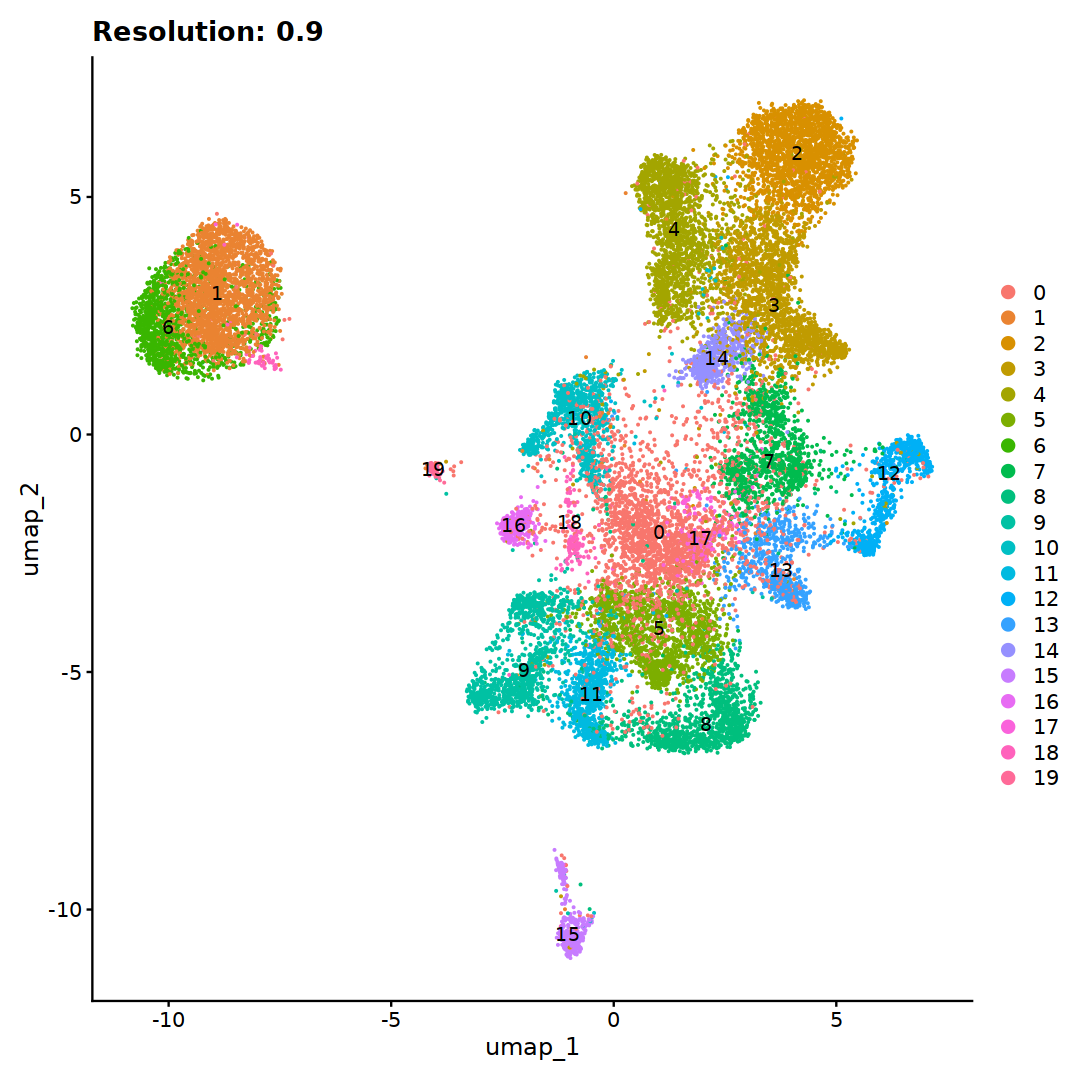

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8467
Number of communities: 28
Elapsed time: 10 seconds


1 singletons identified. 27 final clusters.



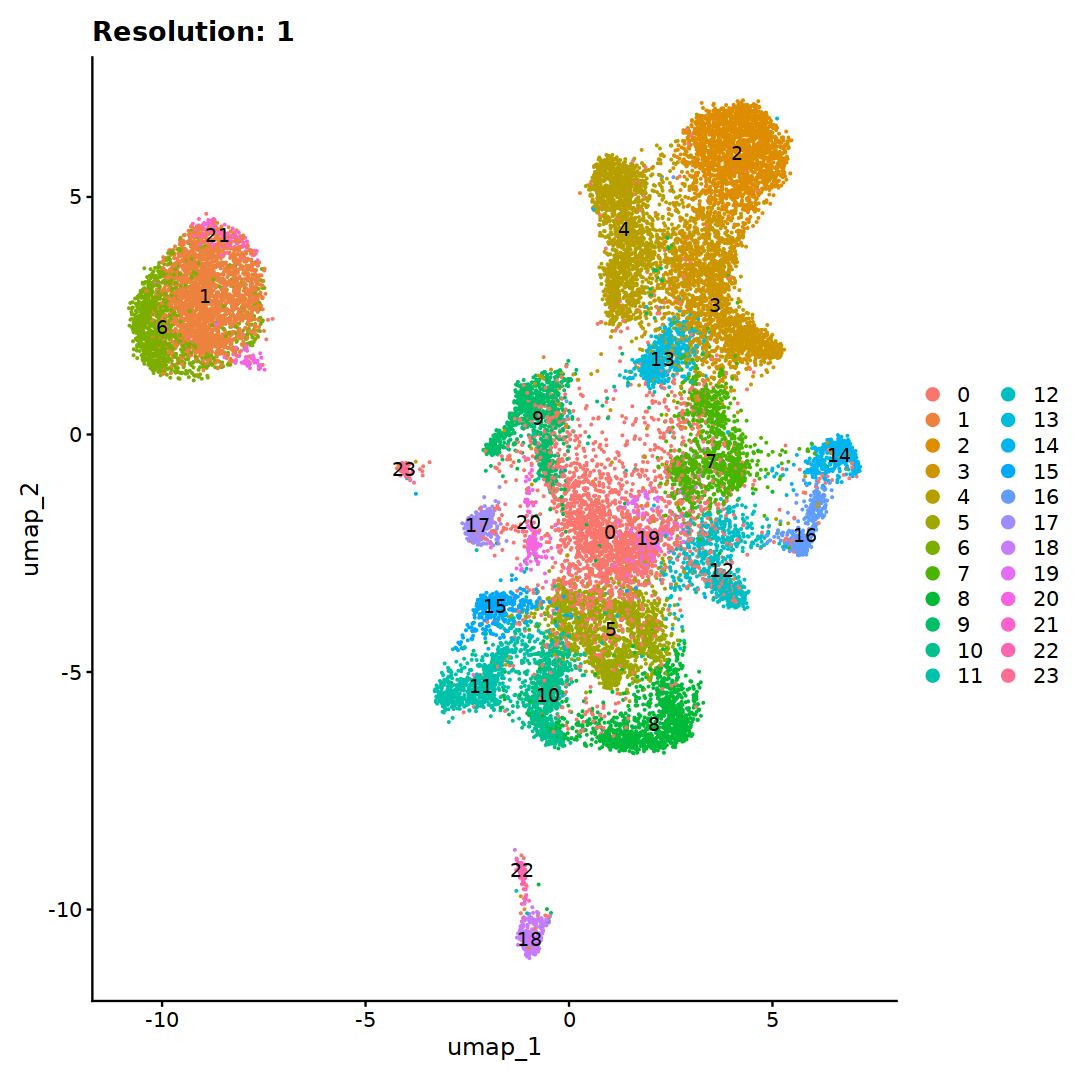

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8311
Number of communities: 30
Elapsed time: 8 seconds


1 singletons identified. 29 final clusters.



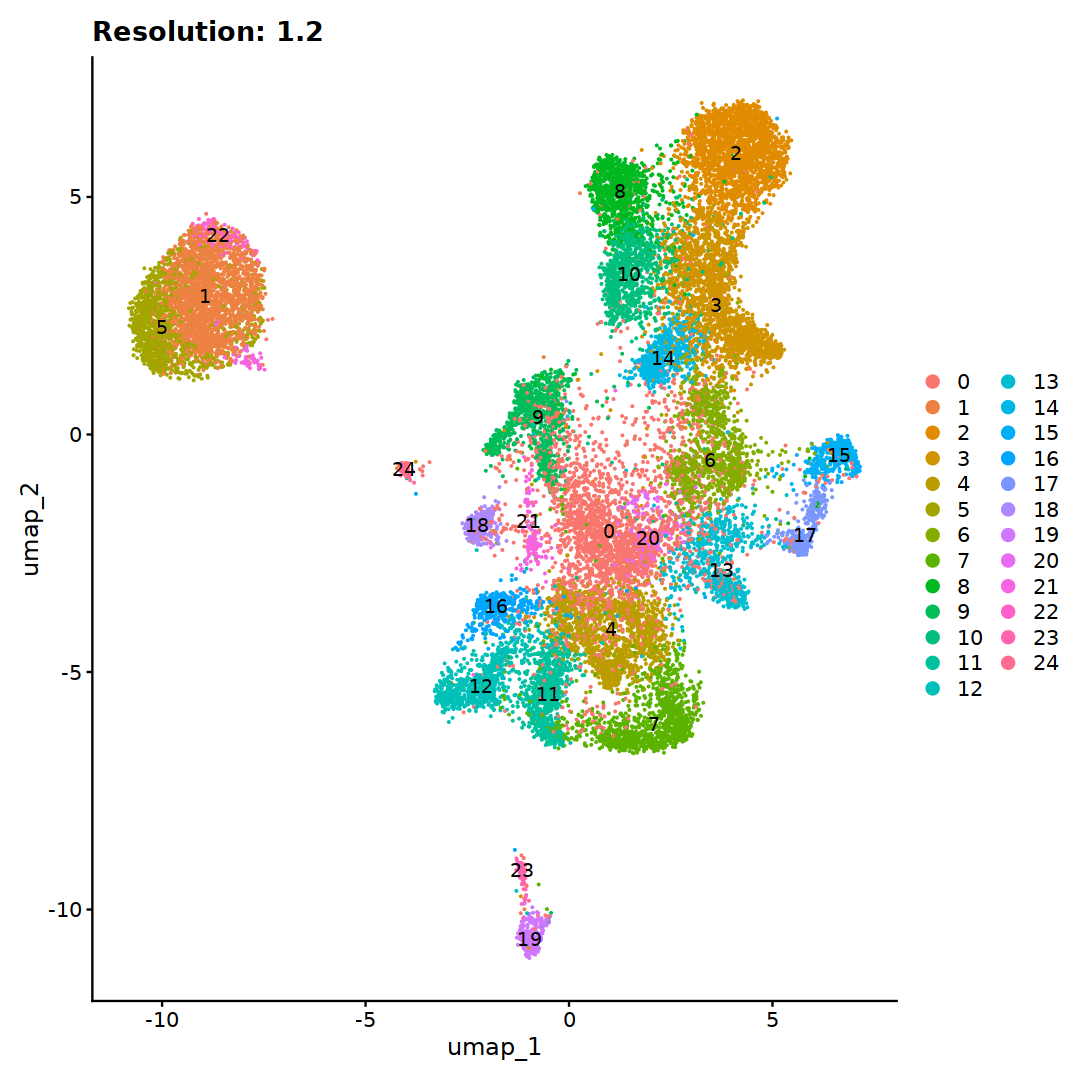

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8212
Number of communities: 31
Elapsed time: 9 seconds


1 singletons identified. 30 final clusters.



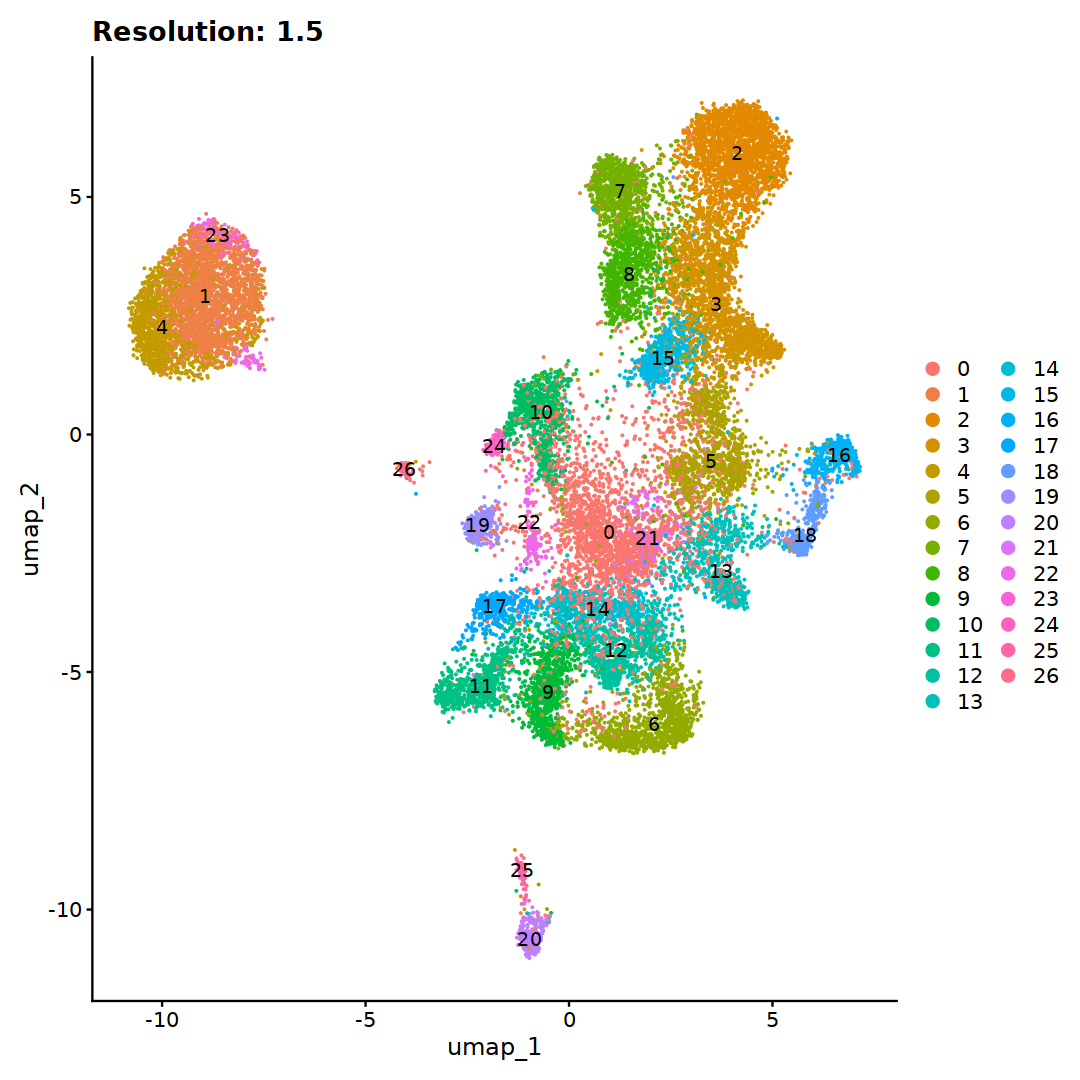

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7992
Number of communities: 35
Elapsed time: 8 seconds


1 singletons identified. 34 final clusters.



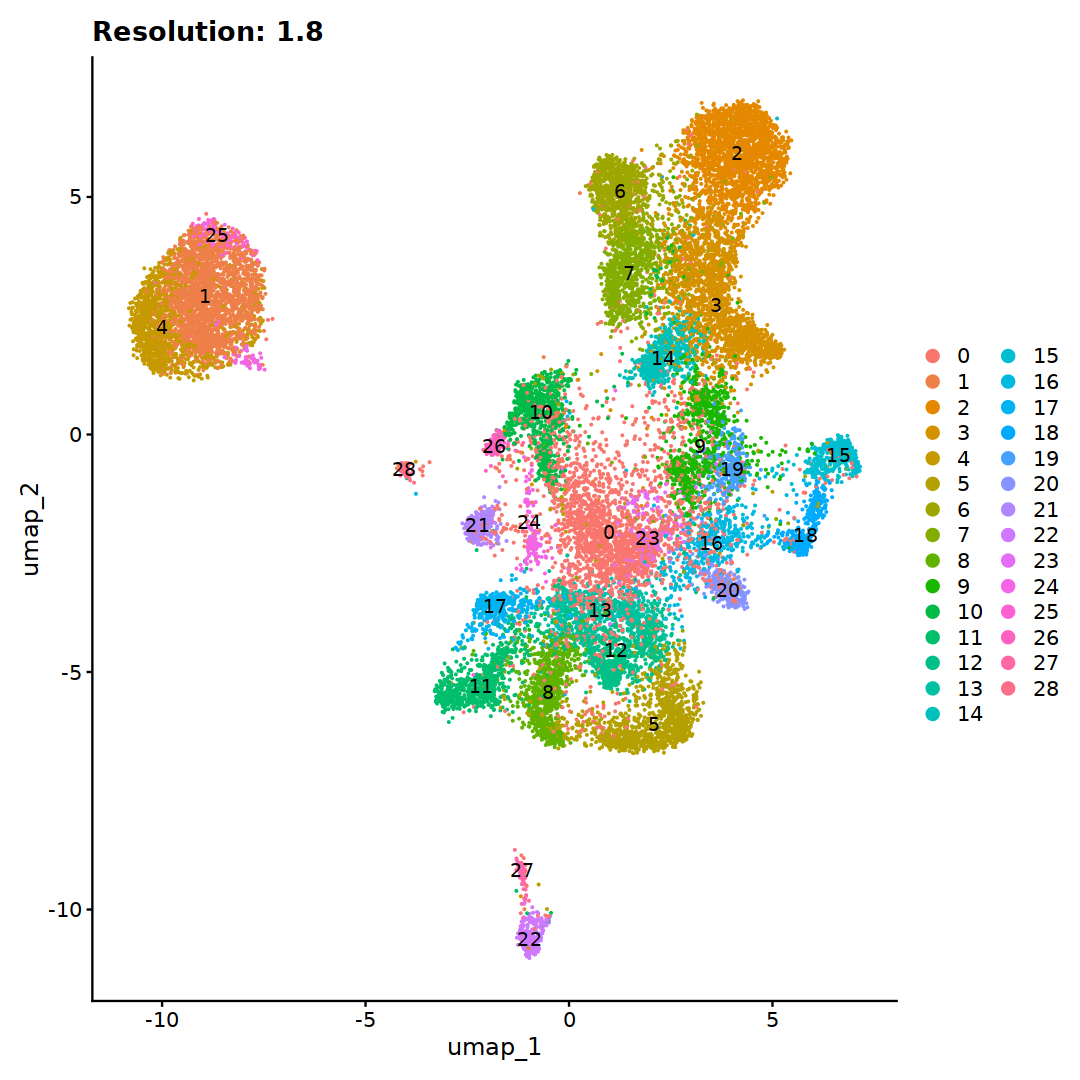

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7806
Number of communities: 38
Elapsed time: 8 seconds


1 singletons identified. 37 final clusters.



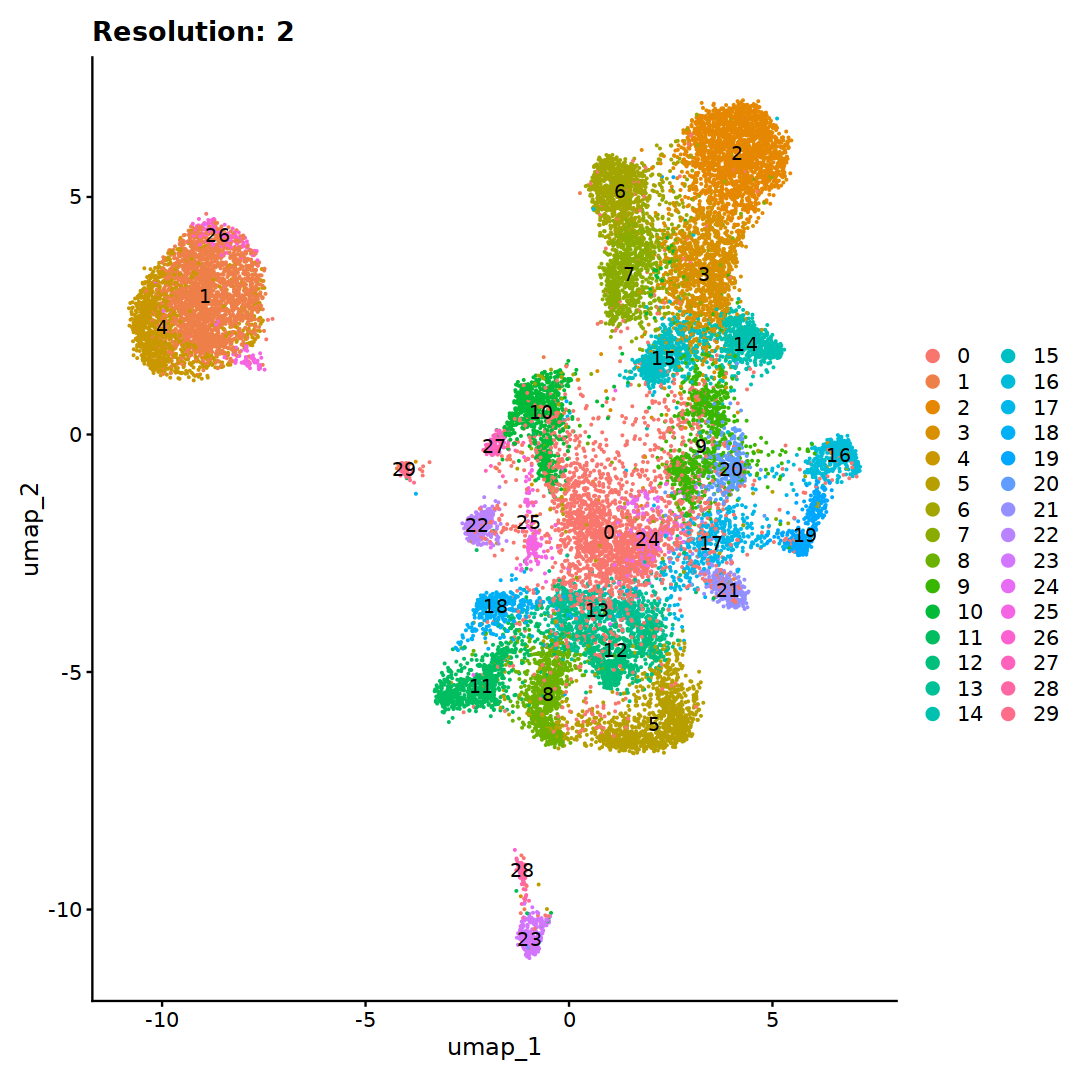

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7632
Number of communities: 40
Elapsed time: 8 seconds


1 singletons identified. 39 final clusters.



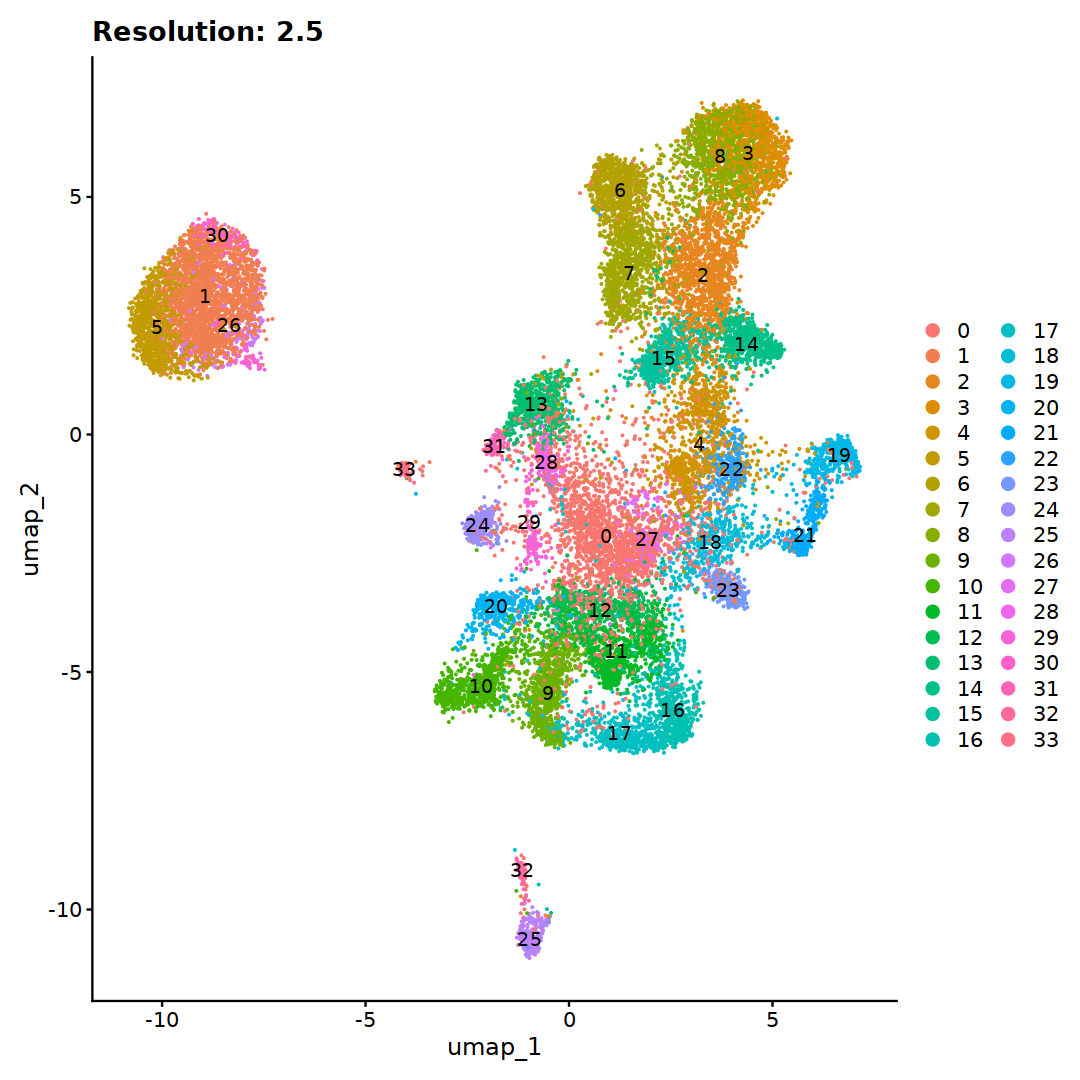

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7472
Number of communities: 43
Elapsed time: 8 seconds


1 singletons identified. 42 final clusters.



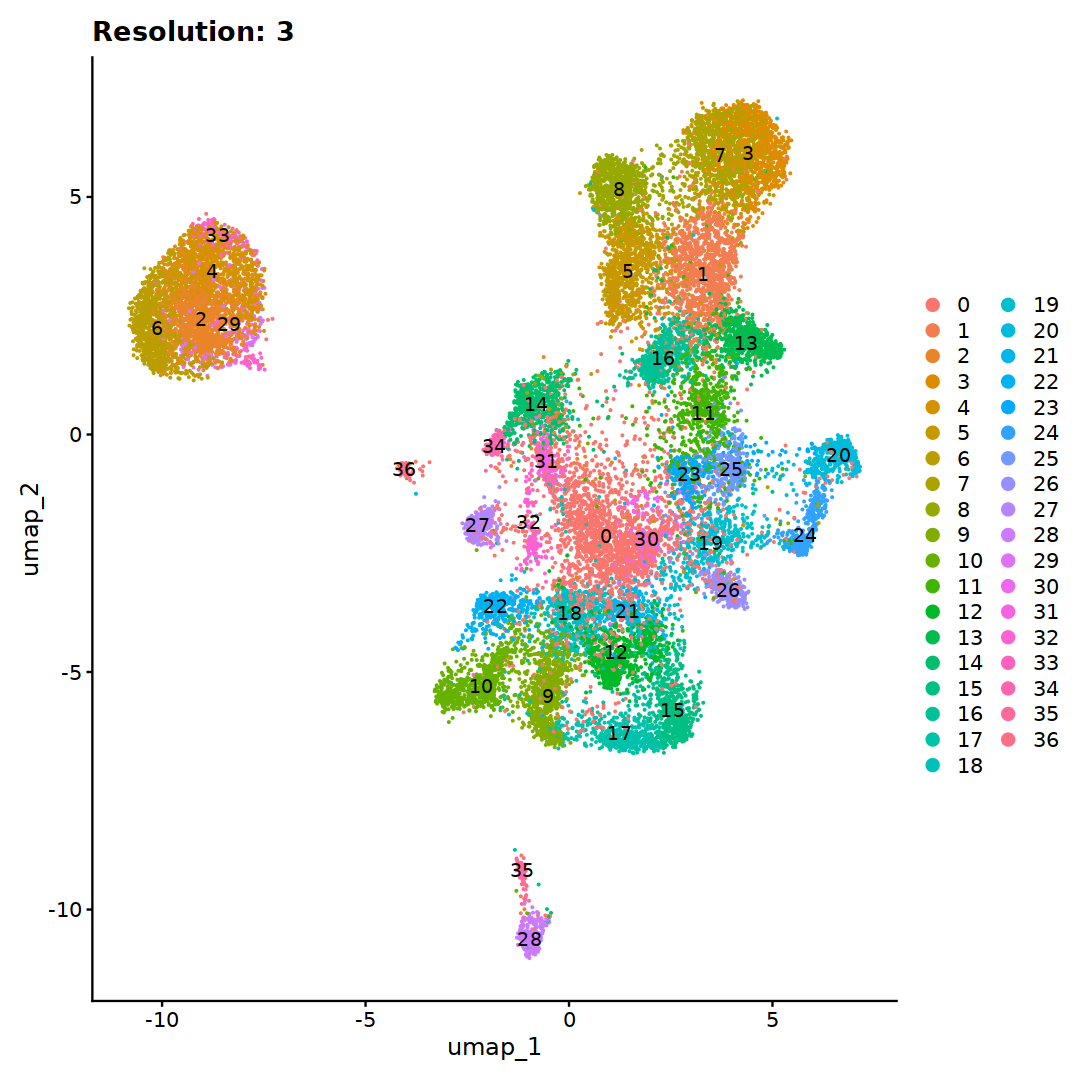

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7328
Number of communities: 45
Elapsed time: 9 seconds


1 singletons identified. 44 final clusters.



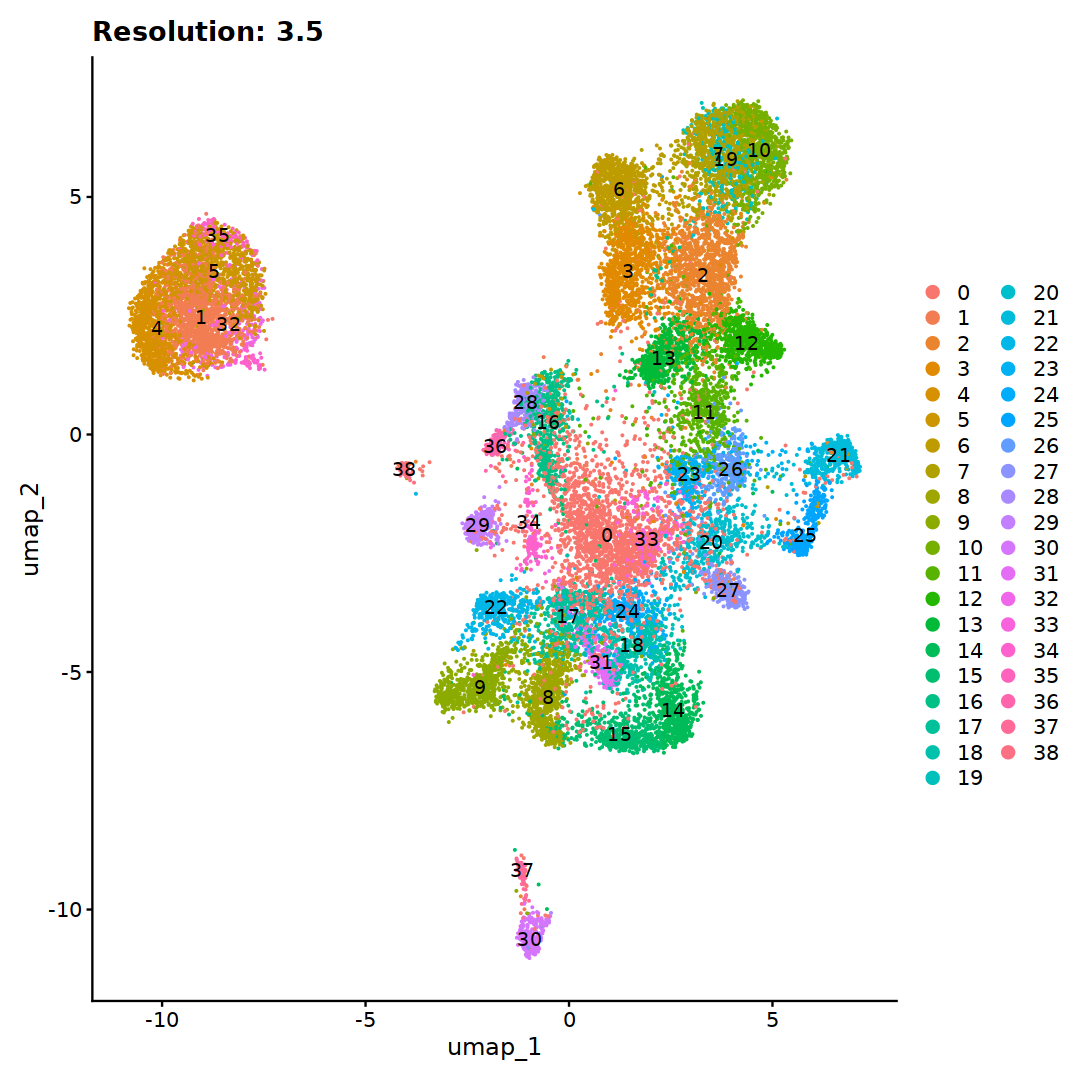

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7194
Number of communities: 45
Elapsed time: 8 seconds


1 singletons identified. 44 final clusters.



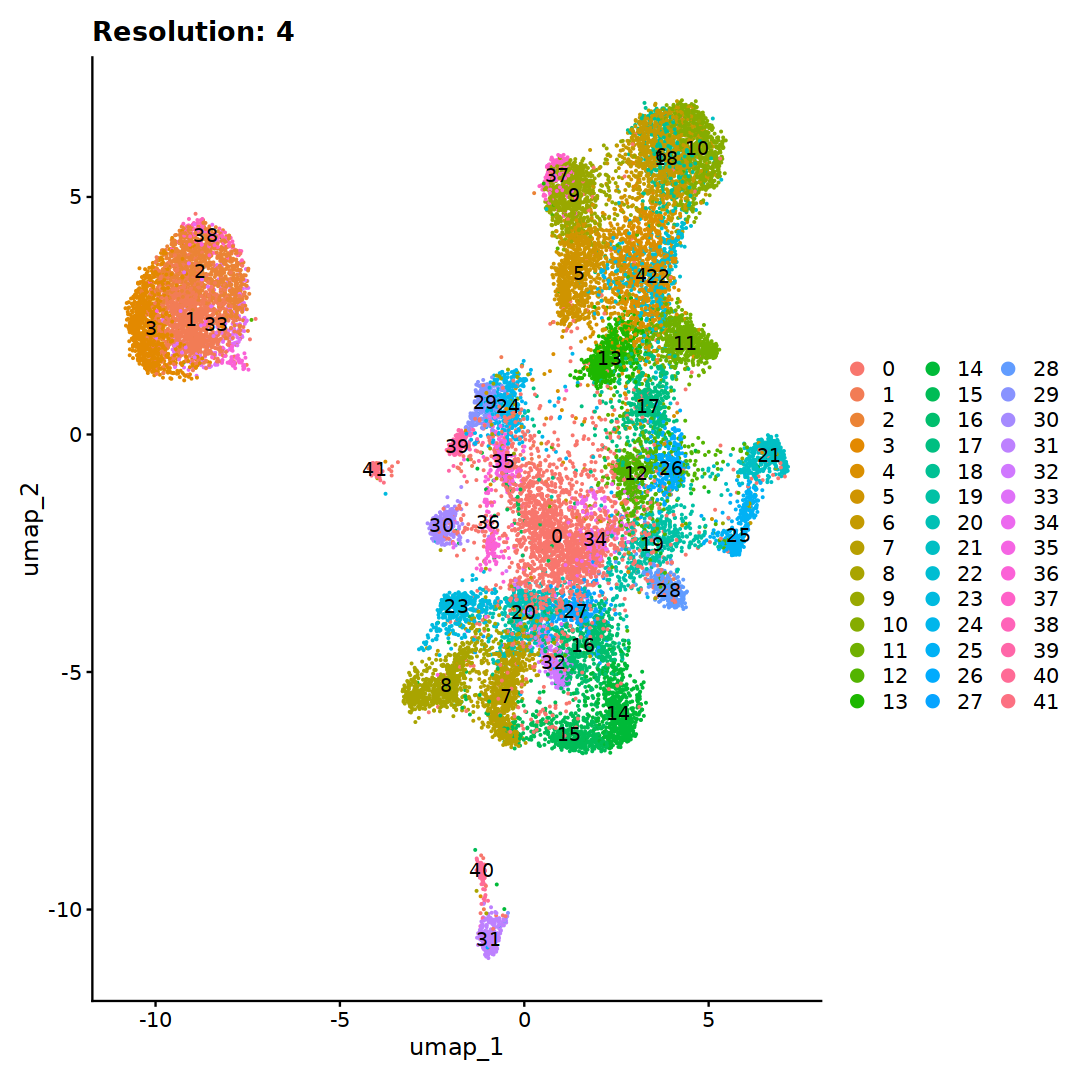

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7062
Number of communities: 50
Elapsed time: 10 seconds


1 singletons identified. 49 final clusters.



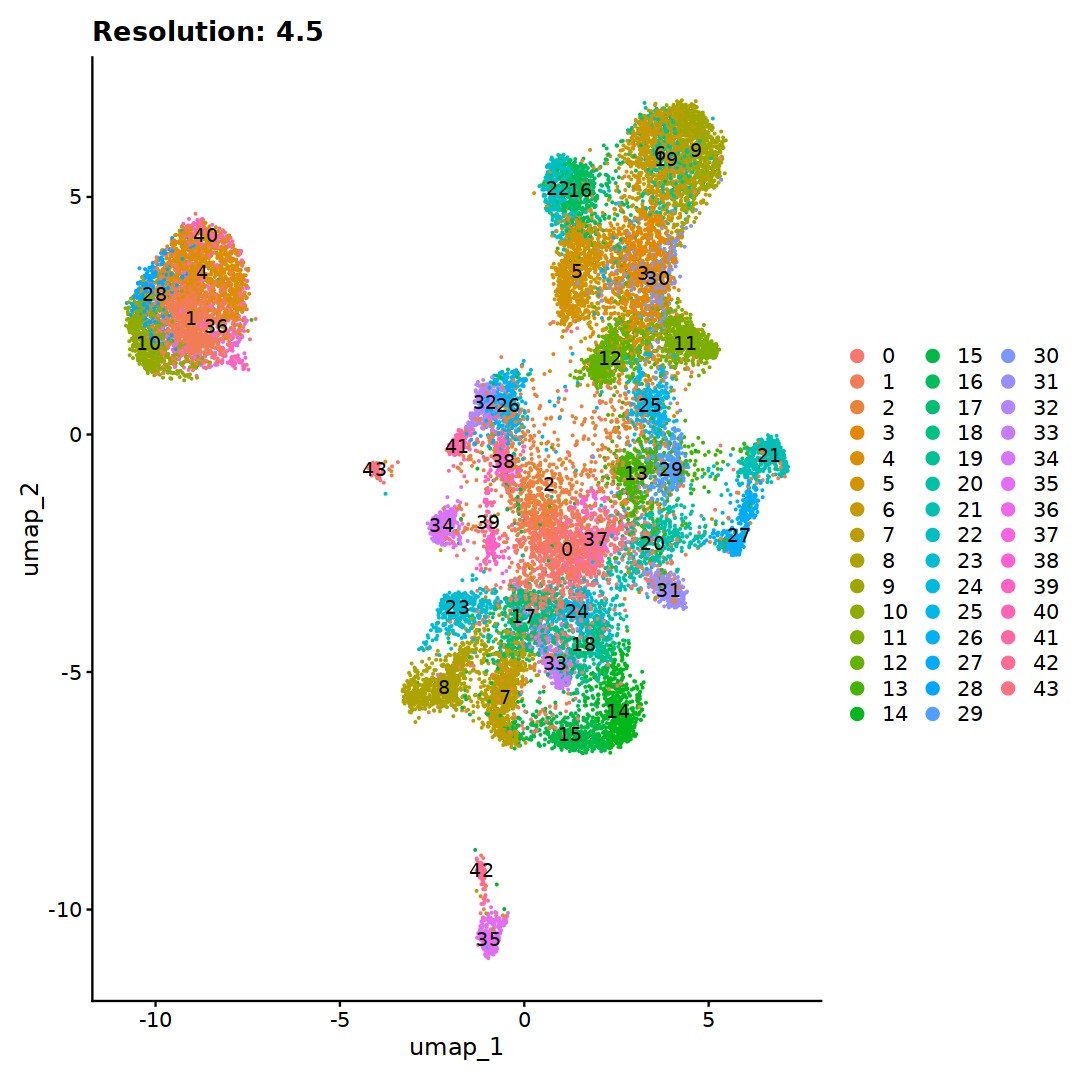

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22317
Number of edges: 851947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6944
Number of communities: 51
Elapsed time: 10 seconds


1 singletons identified. 50 final clusters.



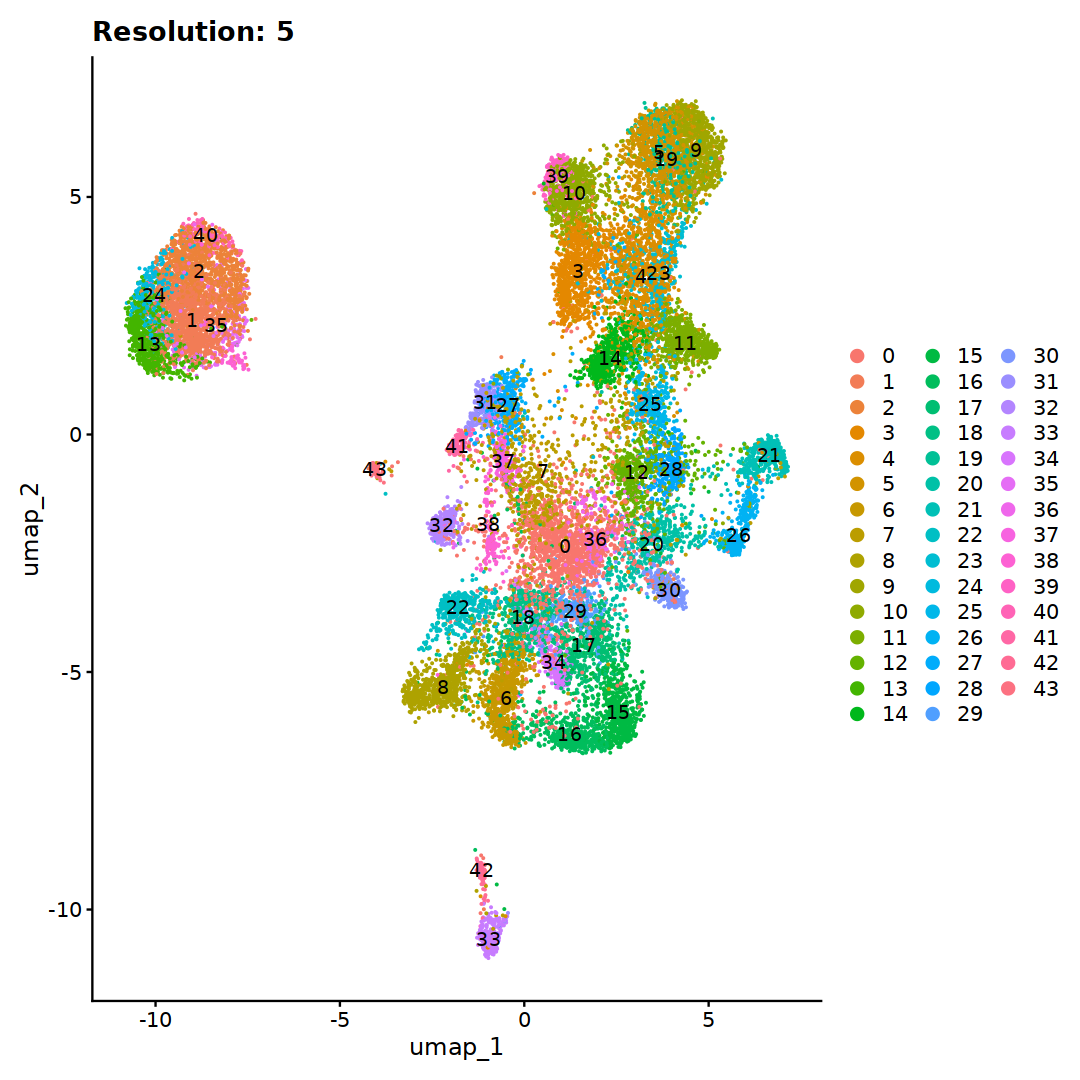

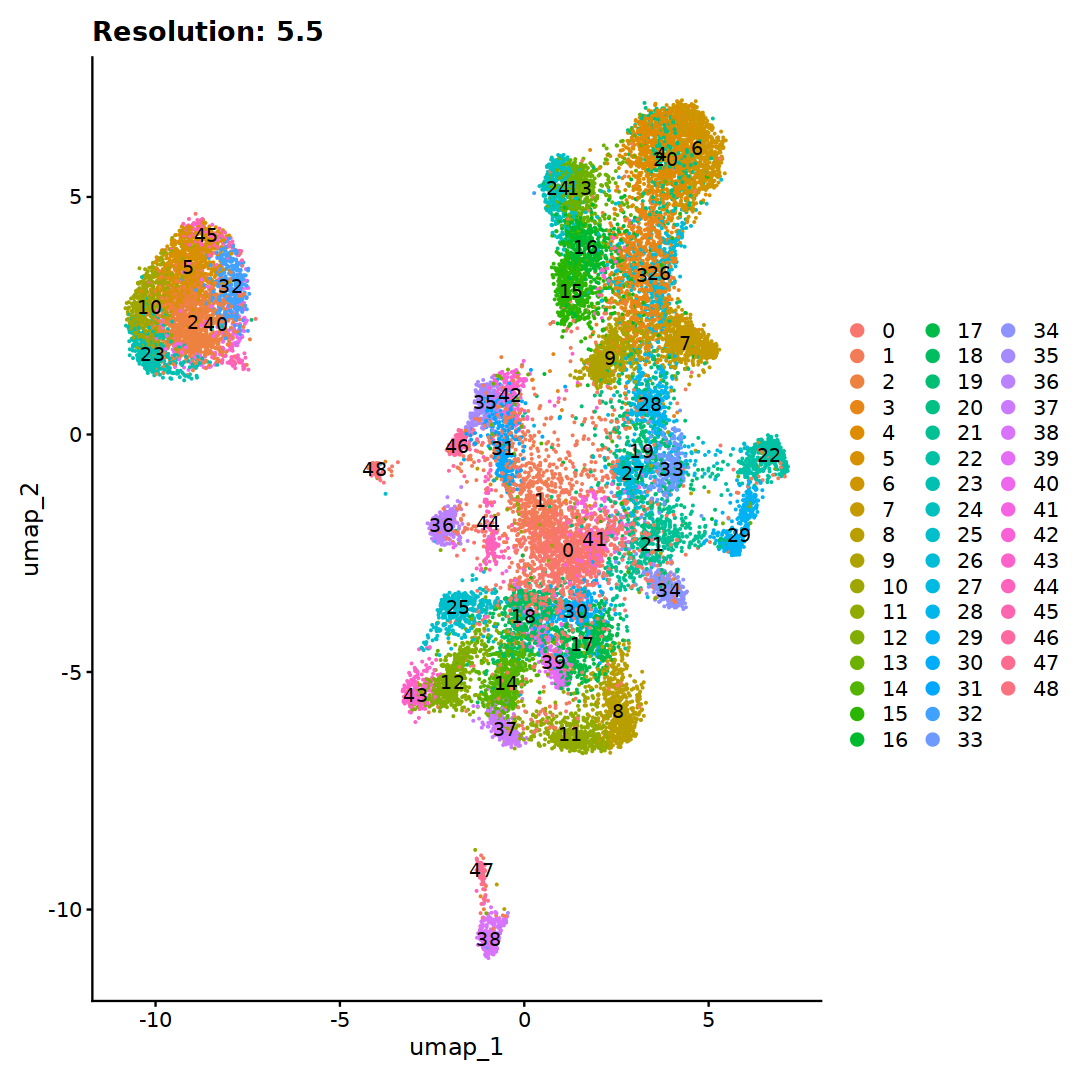

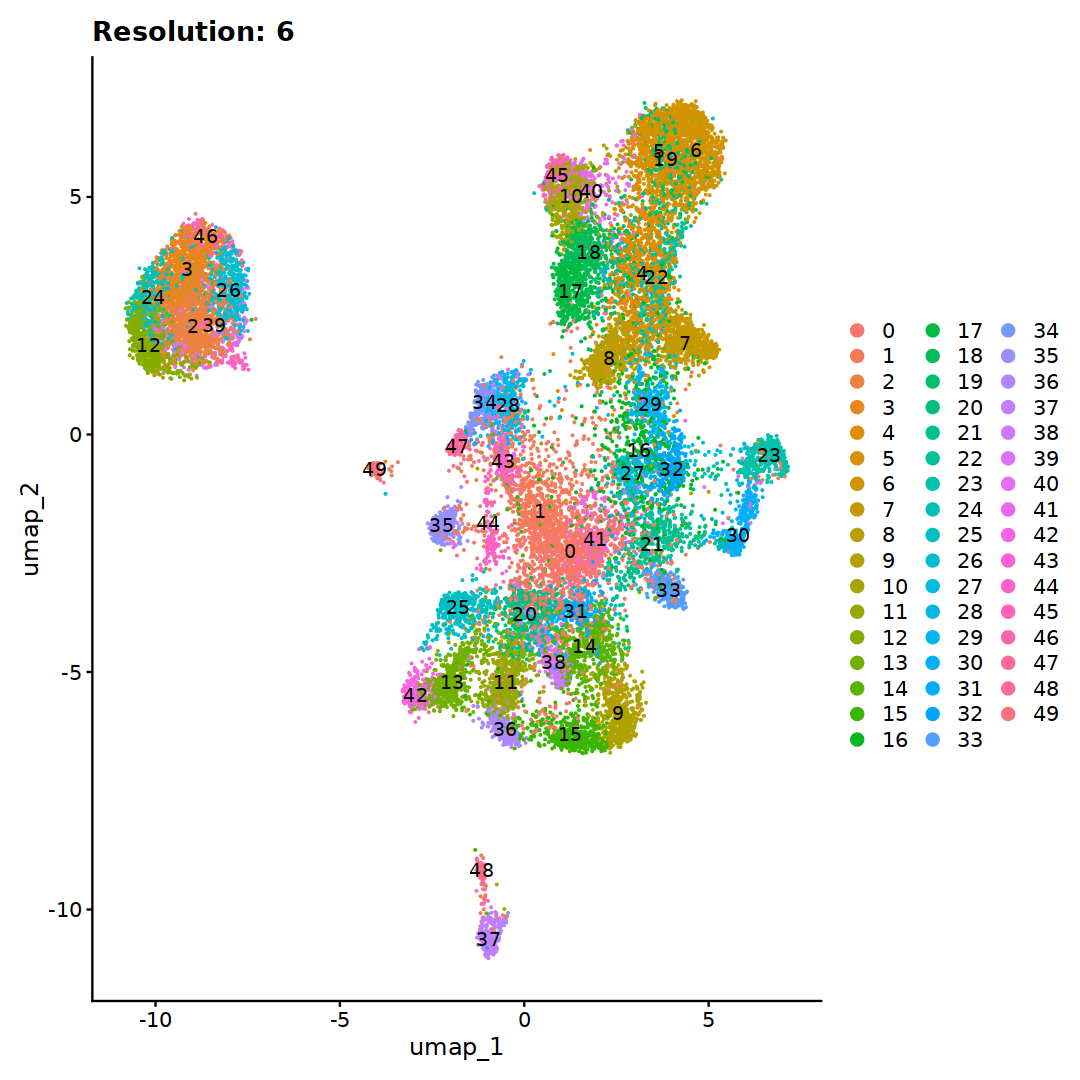

In [14]:
library(Seurat)
library(clustree)
library(dplyr)

# UMAP
Th_Glu <- RunUMAP(Th_Glu, dims = 1:40, verbose = TRUE)

cluster_results <- list()

# re-cluster
for (i in c(0.3,0.6,0.9,1,1.2,1.5, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)) {
  Th_Glu <- FindClusters(Th_Glu, resolution = i)
  
  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("Glu_", res_col_name)
  colnames(Th_Glu@meta.data)[colnames(Th_Glu@meta.data) == res_col_name] <- new_col_name
  
  cluster_results[[paste0("resolution_", i)]] <- Th_Glu
  
  plot <- DimPlot(Th_Glu, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [15]:
saveRDS(Th_Glu, file = '/data/work/5month_Th/Glu/10_budgerigar_brain_5months_Th_Glu_unannotated.rds')